In [15]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [5]:
data, target = load_wine(return_X_y=True, as_frame=True)

In [9]:
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0


In [11]:
target.sample(5)

100    1
44     0
112    1
70     1
122    1
Name: target, dtype: int64

In [13]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


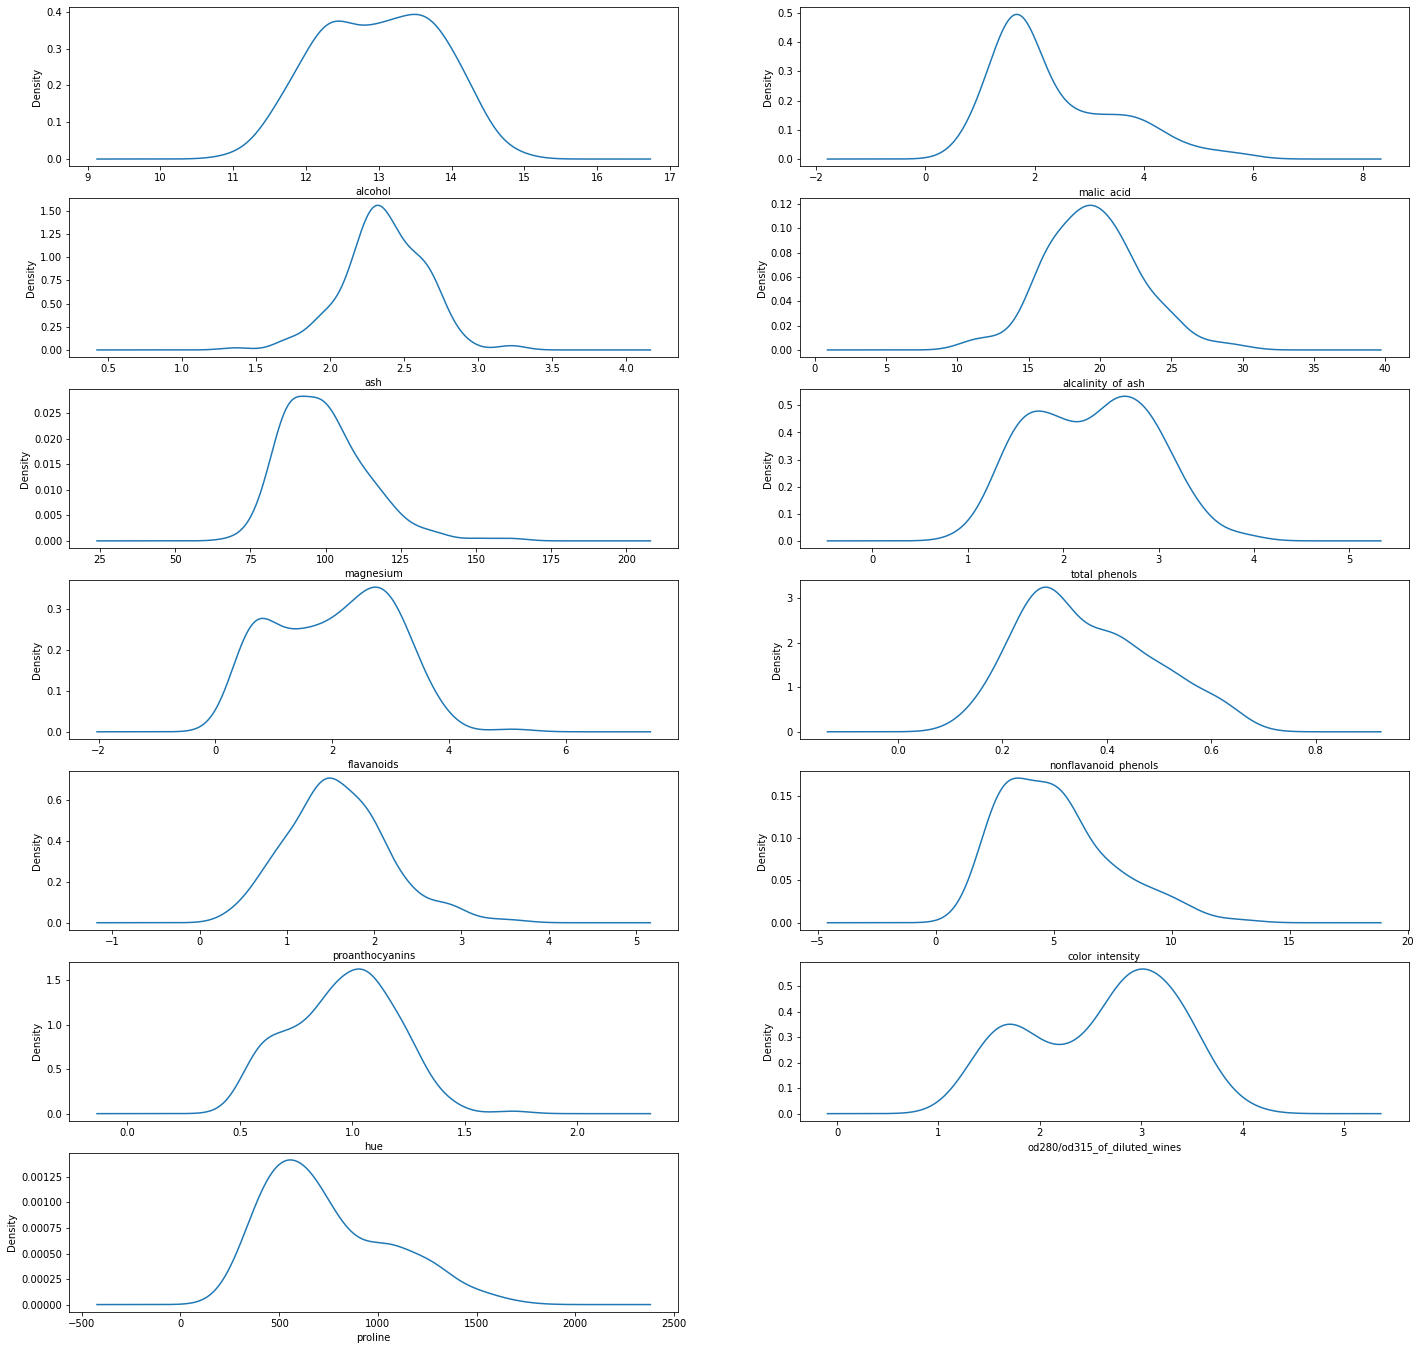

In [47]:
cols=data.columns.to_list()
plt.figure(figsize=(24,24))
def plot_probabilty_density(data, cols):
    no_of_feat = len(cols)
    if no_of_feat%2==0:
        x_dim = no_of_feat//2
    else:
        x_dim = (no_of_feat+1)//2
    y_dim = 2
    dim_of_sub_plot = [x_dim, y_dim]
    l=1
    for col in cols:
        plt.subplot(x_dim,y_dim,l)
        plt.xlabel(col)
        data[col].plot.kde()
        l+=1
        if l== no_of_feat+1:
            break

plot_probabilty_density(data, cols)

In [51]:
# splitting the data into train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
X_train.shape, y_train.shape

((133, 13), (133,))

In [52]:
X_test.shape, y_test.shape

((45, 13), (45,))

In [55]:
# scaling uisng minmax scalar
from sklearn.preprocessing import MinMaxScaler

mm_sc = MinMaxScaler()
X_train_sc = mm_sc.fit_transform(X_train)
X_test_sc = mm_sc.transform(X_test)
X_train_sc[:2], X_test_sc[:2]

(array([[0.57894737, 0.52138493, 0.49197861, 0.40721649, 0.30434783,
         0.29166667, 0.07809111, 0.96      , 0.45886076, 0.88252149,
         0.06504065, 0.08118081, 0.2831669 ],
        [0.38947368, 0.20162933, 0.3315508 , 0.51030928, 0.16304348,
         0.45833333, 0.31453362, 0.38      , 0.33544304, 0.15854823,
         0.45528455, 0.84132841, 0.2810271 ]]),
 array([[0.81578947, 0.68431772, 0.73796791, 0.71649485, 0.2826087 ,
         0.39583333, 0.06290672, 0.86      , 0.2943038 , 0.75644699,
         0.10569106, 0.11439114, 0.20114123],
        [0.53157895, 0.20977597, 0.39572193, 0.32989691, 0.40217391,
         0.79166667, 0.54880694, 0.3       , 0.50949367, 0.3591213 ,
         0.32520325, 0.7601476 , 0.43295292]]))

In [57]:
# Building navie bayes Classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb_clf = GaussianNB()
mnnb_clf = MultinomialNB()

gnb_clf.fit(X_train_sc, y_train)
mnnb_clf.fit(X_train_sc, y_train)

print("Gaussian NB accuracy: ", gnb_clf.score(X_test_sc, y_test))
print("Multinomial NB accuracy: ", mnnb_clf.score(X_test_sc, y_test))

Gaussian NB accuracy:  1.0
Multinomial NB accuracy:  0.9333333333333333
